# TensorFlow and Keras

In [1]:
#Uncomment and use it
#!pip install tensorflow

In [1]:
import tensorflow as tf
%matplotlib inline  

2025-04-26 10:07:11.273249: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-26 10:07:11.405885: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-26 10:07:11.461772: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-26 10:07:11.477564: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-26 10:07:11.577153: I tensorflow/core/platform/cpu_feature_guar

## Tensors

#### Constants

tf.constant creates constant values, these values do not change
or update during optimization process(training phase)

In [2]:
a = tf.constant([50,10])
print(a)

tf.Tensor([50 10], shape=(2,), dtype=int32)


Few things that we can do with the tensors at the runtime:
1. Directly get a numpy value of the tensor
2. dtype : data type of the tensor(int16/int32/float32/float64)
3. shape: shape of the tensor

In [3]:
print('a in tensorflow ==>', a)
print('numpy value of a ==>', a.numpy())
print('dtype of a ==>', a.dtype)
print('shape of a ==>', a.shape)

a in tensorflow ==> tf.Tensor([50 10], shape=(2,), dtype=int32)
numpy value of a ==> [50 10]
dtype of a ==> <dtype: 'int32'>
shape of a ==> (2,)


We can use inbuild tf.XX() function to create constant tensors, just like numpy.

In [4]:
print('Tensor of Ones: \n',tf.ones(shape=(2, 2)))
print('Tensor of Zeros: \n',tf.zeros(shape=(2, 2)))
print('Random normal values \n', tf.random.normal(shape=(3, 2),
                                                  mean=5, 
                                                  stddev=1))

Tensor of Ones: 
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
Tensor of Zeros: 
 tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)
Random normal values 
 tf.Tensor(
[[3.3246903 5.6170464]
 [5.474702  5.1509027]
 [3.3568084 3.8082504]], shape=(3, 2), dtype=float32)


### Variables

We generally create a variable with some values, call it initialized values, 
convert this constant tensor into a variable and then mutate the variable by using special functions.

In [5]:
x = tf.Variable(5) # Simple variable
print(x)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>


In [6]:
#randomly initialized variable, like we need for our weights
w = tf.Variable(tf.random.normal(shape=(2, 2))) 
print(w)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.71744597, -0.41285616],
       [-2.0326703 ,  0.34944674]], dtype=float32)>


In [7]:
m = tf.Variable(5) # Simple variable
print(m)

m = tf.Variable(5) 
print('New value', m.assign(2))

m = tf.Variable(5) 
print('increment by 1', m.assign_add(1))
print(m.numpy())

m = tf.Variable(5) 
print('Decrement by 2', m.assign_sub(2))
print(m.numpy())


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>
New value <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=2>
increment by 1 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=6>
6
Decrement by 2 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=3>
3


### Regression Model building in TensorFlow

#This step is for data creation, x and y

In [8]:
import numpy as np
a = np.random.normal(500, 10)
a

493.7604138991451

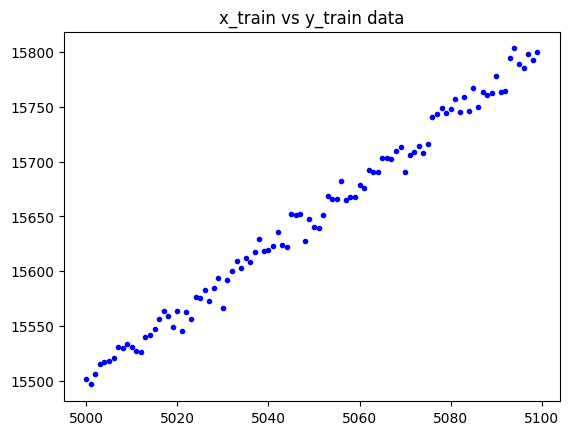

In [9]:
#This step is for data creation, x and y
import numpy as np
x_train= np.array(range(5000,5100)).reshape(-1,1)


y_train=[3*i+np.random.normal(500, 10) for i in x_train]

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.')
plt.show()

In [10]:
#Model y=X*W + b
#Model function
def output(x):
    return W*x + b

#Loss function Reduce mean square
def loss_function(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.random.uniform(shape=(1,))) #(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 500 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}, dW : {dloss_dw.numpy()}, db : {dloss_db.numpy()}")

epoch : 0, loss  228066320.0,  W : [[0.26084226]], b  [1.0000302], dW : [[-1.525162e+08]], db : [-30203.258]
epoch : 1, loss  205398240.0,  W : [[0.40558064]], b  [1.0000588], dW : [[-1.447384e+08]], db : [-28662.996]
epoch : 2, loss  184983232.0,  W : [[0.5429379]], b  [1.000086], dW : [[-1.3735723e+08]], db : [-27201.285]
epoch : 3, loss  166597280.0,  W : [[0.6732904]], b  [1.0001118], dW : [[-1.3035248e+08]], db : [-25814.113]
epoch : 4, loss  150038768.0,  W : [[0.79699534]], b  [1.0001364], dW : [[-1.2370496e+08]], db : [-24497.684]
epoch : 5, loss  135126048.0,  W : [[0.91439176]], b  [1.0001596], dW : [[-1.1739642e+08]], db : [-23248.387]
epoch : 6, loss  121695560.0,  W : [[1.0258014]], b  [1.0001817], dW : [[-1.1140962e+08]], db : [-22062.8]
epoch : 7, loss  109599928.0,  W : [[1.1315296]], b  [1.0002027], dW : [[-1.05728104e+08]], db : [-20937.672]
epoch : 8, loss  98706528.0,  W : [[1.2318659]], b  [1.0002226], dW : [[-1.0033634e+08]], db : [-19869.926]
epoch : 9, loss  888

Final Weights

In [11]:
print('w ', W)
print('b ', b)

w  <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0990386]], dtype=float32)>
b  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.0005918], dtype=float32)>


Plotting

epoch is: 0, loss is 216205632.0,  W is: [[0.33562845]], b is [1.0000294]


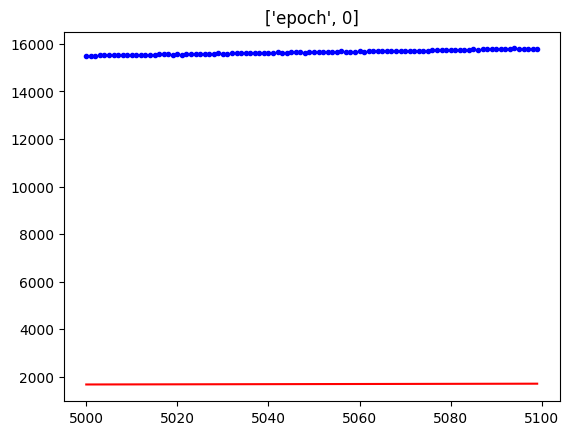

epoch is: 30, loss is 9352716.0,  W is: [[2.5242908]], b is [1.0004629]


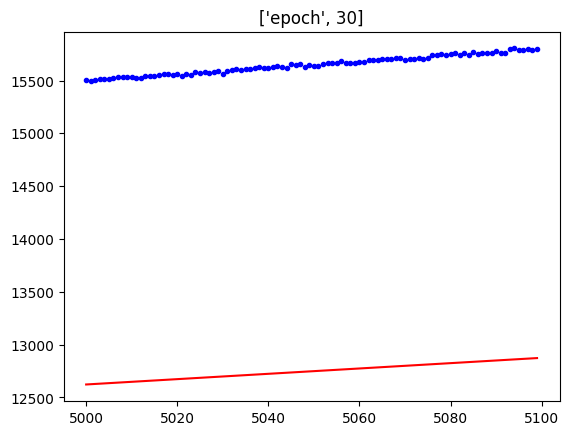

epoch is: 60, loss is 404657.6875,  W is: [[2.979501]], b is [1.0005529]


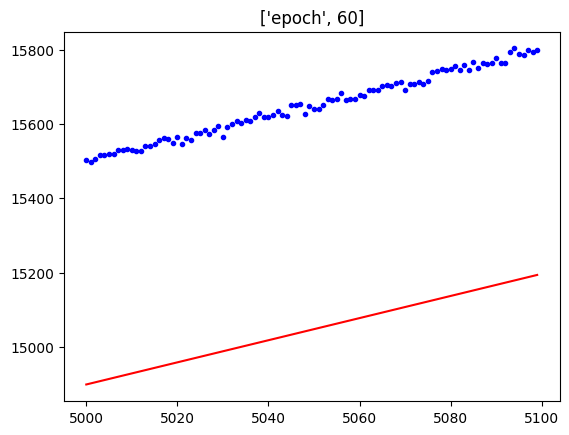

epoch is: 90, loss is 17581.830078125,  W is: [[3.0741785]], b is [1.0005716]


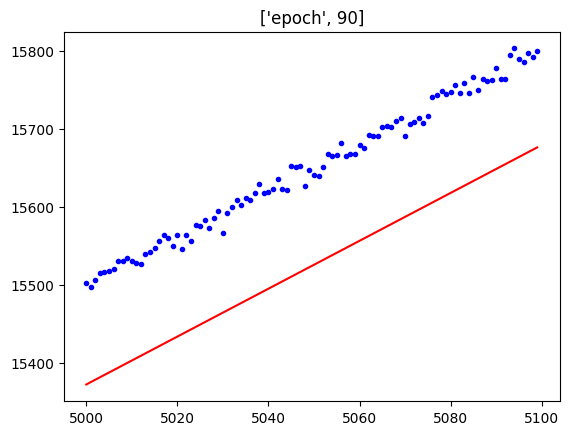

epoch is: 120, loss is 837.7467041015625,  W is: [[3.09387]], b is [1.0005758]


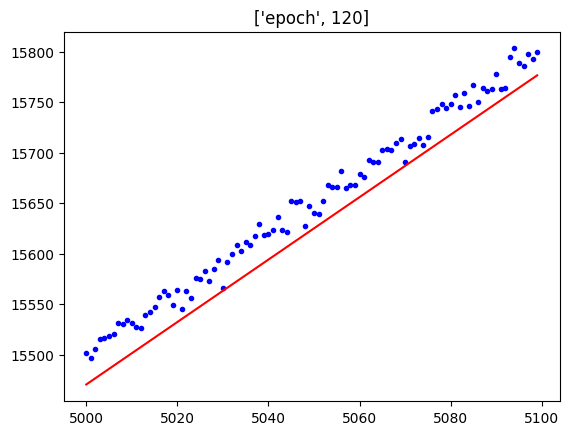

epoch is: 150, loss is 113.48847961425781,  W is: [[3.0979652]], b is [1.0005758]


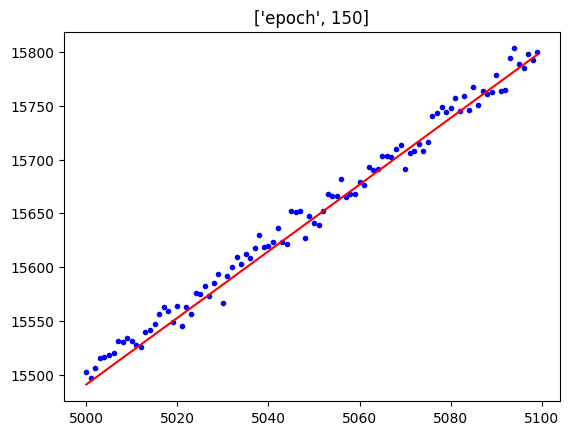

epoch is: 180, loss is 82.14958190917969,  W is: [[3.0988173]], b is [1.0005758]


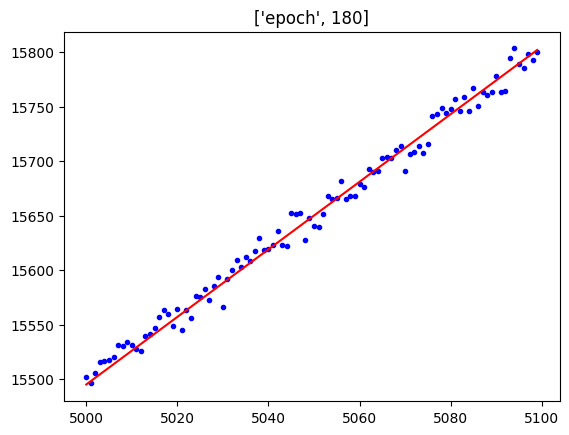

In [12]:
#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    if i%20 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b.')
        plt.plot(x_train, output(x_train), c='r')
        plt.show()

### Logistic Regression Model building in TensorFlow

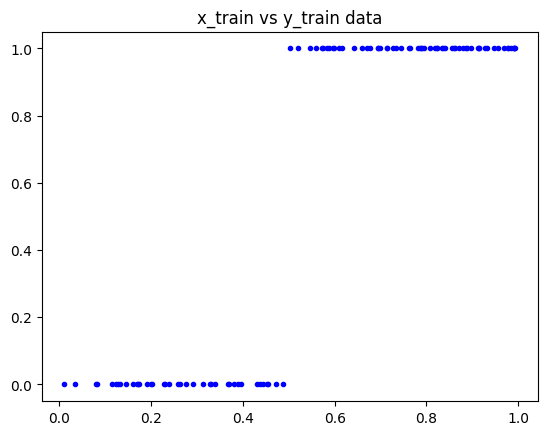

In [13]:
# This step is for data creation
x_train= np.random.rand(100,1)
y_train=np.array([0 if i < 0.5 else 1 for i in x_train]).reshape(-1,1)

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.',)
plt.show()

In [14]:
#Model y=sigmoid(X*W + b)
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  19.602474212646484,  W : [[1.238283]], b  [-0.0585016]
epoch : 1, loss  17.69290542602539,  W : [[1.4933091]], b  [-0.41344705]
epoch : 2, loss  16.059593200683594,  W : [[1.8719124]], b  [-0.51685596]
epoch : 3, loss  14.684410095214844,  W : [[2.1251228]], b  [-0.7672633]
epoch : 4, loss  13.525278091430664,  W : [[2.4293973]], b  [-0.87787586]
epoch : 5, loss  12.547202110290527,  W : [[2.6621585]], b  [-1.0607746]
epoch : 6, loss  11.718517303466797,  W : [[2.91043]], b  [-1.1719161]
epoch : 7, loss  11.011344909667969,  W : [[3.120726]], b  [-1.3097658]
epoch : 8, loss  10.403372764587402,  W : [[3.328897]], b  [-1.4158249]
epoch : 9, loss  9.87630844116211,  W : [[3.517115]], b  [-1.5260168]
epoch : 10, loss  9.415809631347656,  W : [[3.697161]], b  [-1.622833]
epoch : 11, loss  9.010429382324219,  W : [[3.865238]], b  [-1.7162879]
epoch : 12, loss  8.651069641113281,  W : [[4.0247173]], b  [-1.8029768]
epoch : 13, loss  8.330427169799805,  W : [[4.175613]], b  [

Plotting

epoch is: 0, loss is 24.373132705688477,  W is: [[0.9704746]], b is [0.49954548]


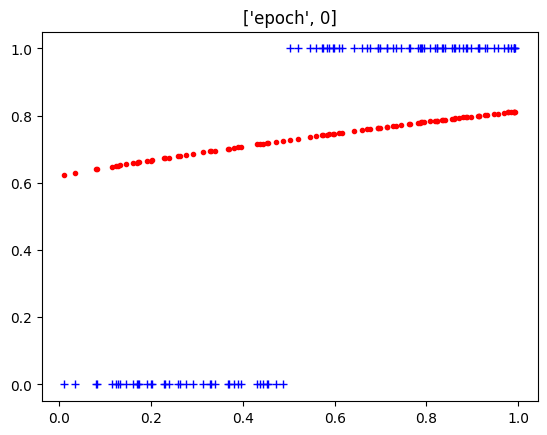

epoch is: 40, loss is 5.011585712432861,  W is: [[6.6201124]], b is [-3.1810389]


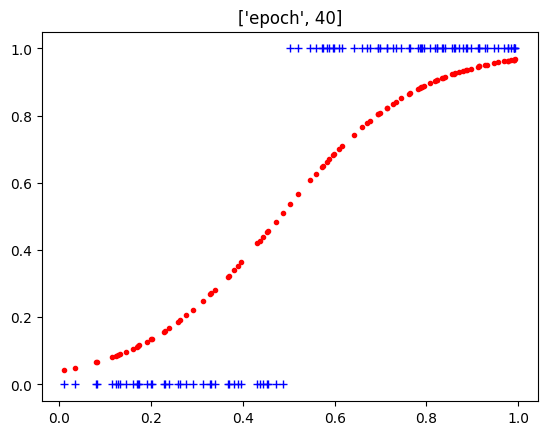

epoch is: 80, loss is 3.7125964164733887,  W is: [[8.599515]], b is [-4.203586]


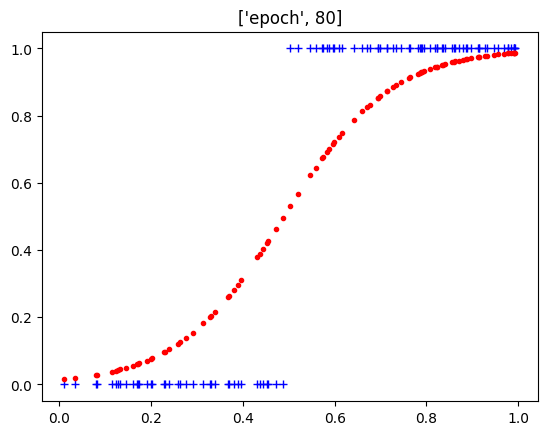

epoch is: 120, loss is 3.1491007804870605,  W is: [[9.923454]], b is [-4.880888]


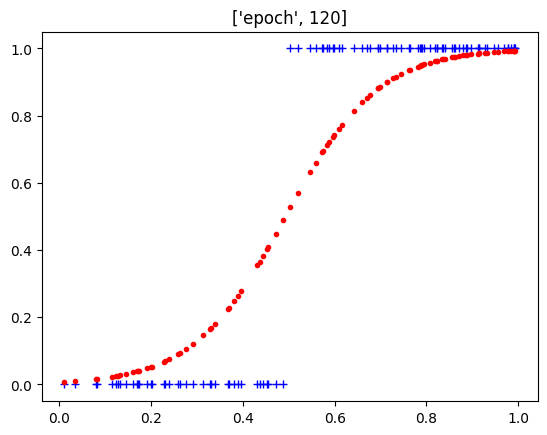

epoch is: 160, loss is 2.8092947006225586,  W is: [[10.956416]], b is [-5.407035]


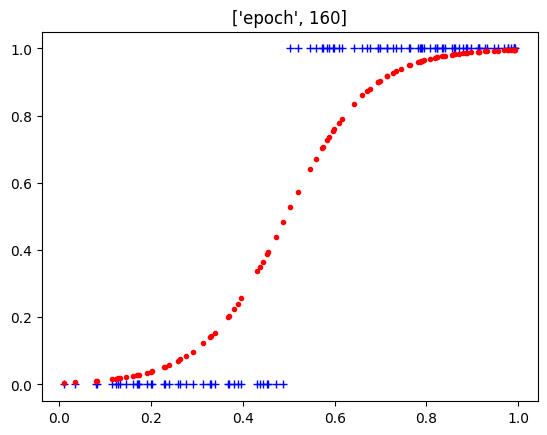

epoch is: 200, loss is 2.5730810165405273,  W is: [[11.819559]], b is [-5.8455725]


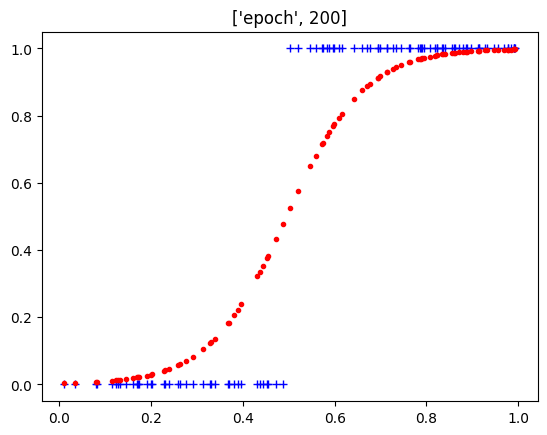

epoch is: 240, loss is 2.395317554473877,  W is: [[12.569291]], b is [-6.225852]


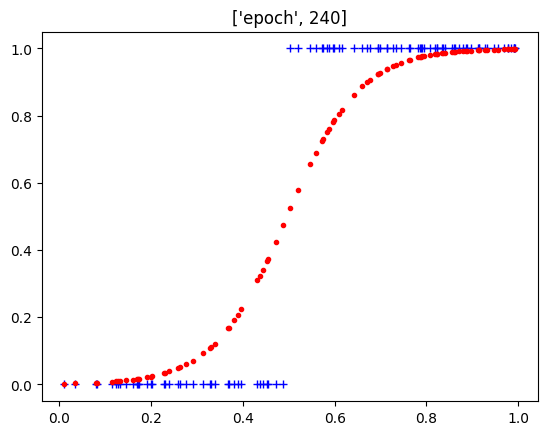

epoch is: 280, loss is 2.25459623336792,  W is: [[13.236905]], b is [-6.5640707]


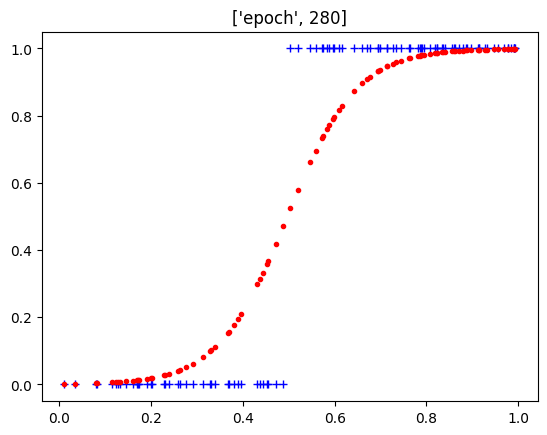

In [15]:
#Model y=X*W + b
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)

    if i%40 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b+')
        plt.plot(x_train, output(x_train), '.', c='r')
        plt.show()

# Keras

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [17]:
## The data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

num_classes=10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 784) train input samples
(10000, 784) test input samples
(60000, 10) train output samples
(10000, 10) test output samples


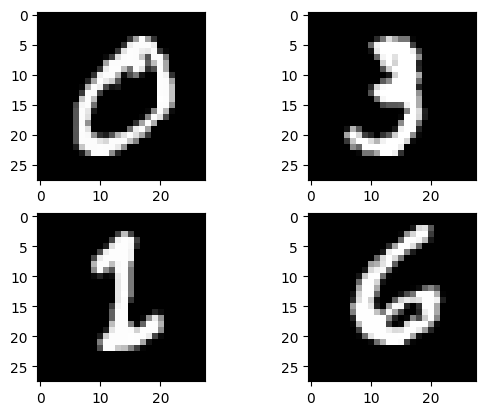

In [18]:
# Plot 4 images as gray scale

%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[188], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[10], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[70], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[90], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [32]:
model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
#Input Layer. The model needs to know what input shape it should expect. 
#For this reason, the first layer in a Sequential model needs to receive information about its input shape.
#Only the first need the snape information, because following layers can do automatic shape inference
model.add(layers.Dense(300, activation='sigmoid')) #, input_shape=(784,)))

#The dense layer is simply a layer where each unit or neuron is connected to each neuron in the next layer.
model.add(layers.Dense(100, activation='sigmoid'))

#In the final layer mention the output classes
model.add(layers.Dense(10, activation='sigmoid'))

#Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
import plot_keras_history

# Compiling model : we define loss function, optimizer and validation matric of our choice
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fit method: actually running our model by supplying our input and validation data
history = model.fit(x_train, y_train,epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8117 - loss: 0.7039 - val_accuracy: 0.9371 - val_loss: 0.2067
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9439 - loss: 0.1880 - val_accuracy: 0.9586 - val_loss: 0.1384
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9617 - loss: 0.1252 - val_accuracy: 0.9662 - val_loss: 0.1086
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9721 - loss: 0.0930 - val_accuracy: 0.9699 - val_loss: 0.0915
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9784 - loss: 0.0717 - val_accuracy: 0.9743 - val_loss: 0.0852
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9822 - loss: 0.0588 - val_accuracy: 0.9743 - val_loss: 0.0805
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9847 - loss: 0.0498 - val_accuracy: 0.9790 - val_loss: 0.0768
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9887 - loss: 0

In [37]:
#print(model.get_weights())

[array([[-0.03924665, -0.03283266,  0.06351708, ..., -0.03048955,
        -0.07372241,  0.06111051],
       [-0.06632501, -0.03092621,  0.06993634, ..., -0.01136587,
        -0.0718952 , -0.07084469],
       [-0.02026342, -0.0228289 ,  0.00107275, ...,  0.00331325,
         0.01658686, -0.0358747 ],
       ...,
       [ 0.04375122, -0.00360584, -0.0008487 , ...,  0.04768093,
         0.05128235, -0.06773812],
       [-0.00563414, -0.04938094,  0.04662398, ...,  0.0165135 ,
         0.03030033,  0.00370723],
       [-0.00189671, -0.02689522, -0.01959799, ...,  0.01365563,
         0.05693388,  0.05302584]], dtype=float32), array([ 0.06474818, -0.21597844,  0.14737707, -0.05679528,  0.253635  ,
       -0.14797483, -0.38482633,  0.11268029, -0.04407668, -0.05346228,
       -0.08097006, -0.297526  , -0.04158252, -0.11720168,  0.07469366,
        0.01131432, -0.23184241, -0.11976929, -0.00696798, -0.08553717,
       -0.14976113,  0.10447081, -0.10557453,  0.05077345, -0.02233579,
        0.

In [38]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

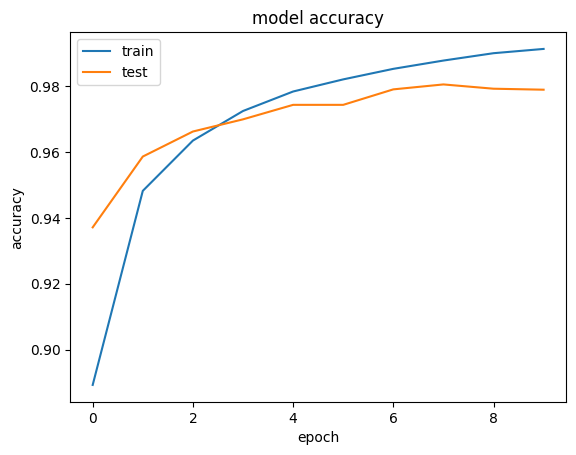

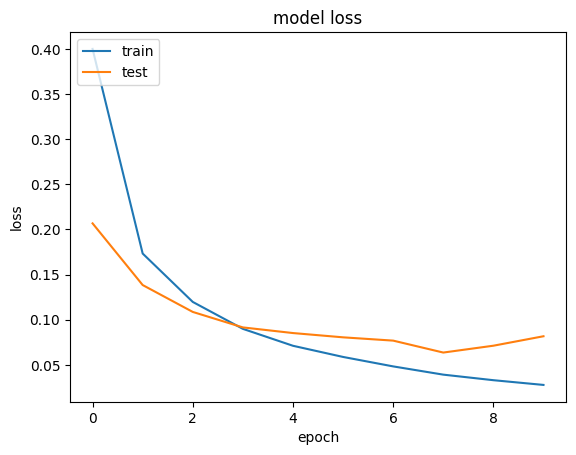

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Evaluate the model and print the results

In [24]:
loss, acc = model.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - 3ms/step - accuracy: 0.9820 - loss: 0.0817
Test Accuracy: 98.20%
